A continuación se presentan los pasos para un análisis exploratorio y de limpieza de Datos

In [1]:
import pandas as pd
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
df_cour_rev = pd.read_csv("./Moocs/Coursera_reviews.csv")

1. Observación de las caracteristicas del Data frame (cálculo de nulos y eliminación de duplicados)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


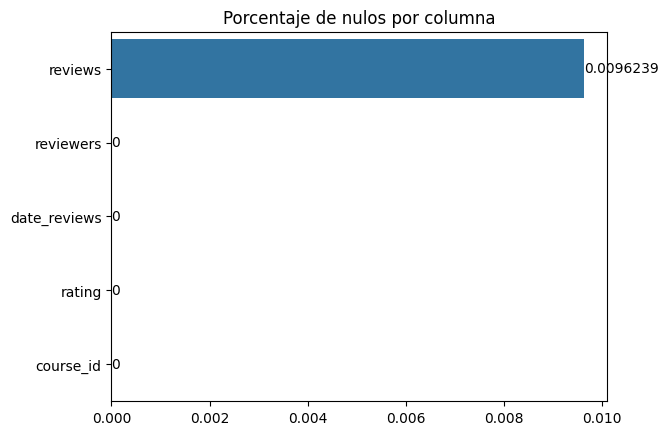

In [2]:
df_cour_rev.info()
df_cour_rev.isnull().sum()
ax = sns.barplot(x = ((df_cour_rev.isnull().sum()*100/df_cour_rev.shape[0])).values, y = df_cour_rev.columns)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de nulos por columna')

#Eliminación de Duplicados
df_cour_rev.drop_duplicates(inplace=True)
#Dado que la cantidad de nulos en la columna reviews representa menos del 1% se pueden eliminar 
df_cour_rev = df_cour_rev.dropna()


2. Se Ajusta la columna de fecha - Conviertiendolo a un formato que permita una mejor manipulación del dato

In [3]:
#Se cambia el formato de fecha de los reviews
df_cour_rev["date_reviews"] = pd.to_datetime(df_cour_rev["date_reviews"], format='%b %d, %Y')
df_cour_rev["date_reviews"].head()
df_cour_rev['year'] = df_cour_rev['date_reviews'].dt.year
df_cour_rev['month'] = df_cour_rev['date_reviews'].dt.month

3. Limpieza de datos en la columna de texto reviews-esto permitirá la generación de un wordcloud más eficientemente

In [4]:
#Poner todo en minuscula
df_cour_rev['reviews_clean'] = df_cour_rev['reviews'].str.lower()
# Sustituir todos los caracteres no alfabéticos por un espacio en blanco
df_cour_rev['reviews_clean'] = df_cour_rev['reviews_clean'].str.replace('[^a-zA-Z]', ' ', regex=True)

# Sustitución de caracteres especiales 
def clean_values(series, to_replace, value, regex = True):
    for i in to_replace:
        series = series.str.replace(i, value, regex=regex)
    return series

pattern = [';',',','.',':','!','&','#','#','$','"',"'","-"]
df_cour_rev['reviews_clean'] = clean_values(df_cour_rev['reviews_clean'],pattern,value=' ',regex = True)
#Se aplica el metodo strip para borrar espacios en blanco
df_cour_rev['reviews_clean']=df_cour_rev['reviews_clean'].str.strip()
#Eliminar espacios en blanco
df_cour_rev['reviews_clean'] = df_cour_rev['reviews_clean'].str.replace(r'\s+',' ',regex=True)
#eliminar numeros
df_cour_rev['reviews_clean'] = df_cour_rev['reviews_clean'].str.replace(r'\d+', ' ', regex=True)
#eliminar multiples espacios en blanco
df_cour_rev['reviews_clean'] = df_cour_rev['reviews_clean'].str.replace(r'\s+s+\s', ' ', regex=True)

4.Generacion de Wordcloud para el campo de reviews - se hace uso de stopwors para eliminar campos de poco interes

There are 66712707 words in the combination of all review.


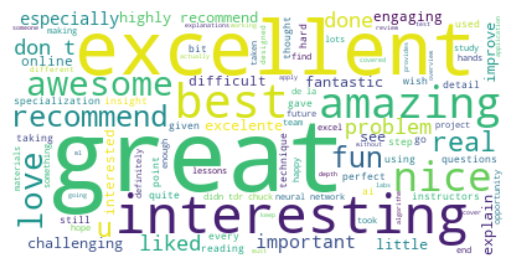

In [5]:
reviews = " ".join(str(reviews) for reviews in df_cour_rev['reviews_clean'])
print ("There are {} words in the combination of all review.".format(len(reviews)))

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["course", "learn", "learned","thank",
                "thanks","s","S","much","one","lot",
                "easy","video","beginner", "basic",
                "basic","learn", "fundamental", "international", "wharton",
                "fundamentals","introduction","intro","uva darden","uva","darden",
                "principles","foundation","foundations","learning",
                "big","everyday","tools","part","analysis","system","science",
                "essential", "essentials","basics","thinking","world","work","systems",
                "method","structure","methods","practice","risk","skills","creating","concept"
                ,"content","knowledge","useful","assignment","helpful","material","way","coursera",
                "python","good","understand","videos","really","time","lecture","data","help",
                "informative","enjoyed","machine","topic","student","understanding","lectures",
                "give","clear","helped","better","well","use","take","courses","think","beginners",
                "thing","start","assignments","loved","class","example","make","know","concepts",
                "experience","information","curso","even","explained","examples","things","want",
                "people","made","taught","programming","instructor","will","professor","instructor",
                "teaching","many","now","deep","many","first","simple","practical","need","new","week",
                "explanation","teacher","field","found","overall","complete","students",
                "follow","feel","exercise","able","gives","don t","m","exercises","quizze","learnt",
                "topics","lesson","provide","anyone","learnt","idea","question","wonderful","structured",
                "andrew","ng","though","ve","quizzes","language","everyone","lab","life","got","provided",
                "subject","speacially","makes","code","hand","presented","everything","helps"])

# Generar una imagen de nube de palabras
wordcloud = WordCloud(stopwords=stopwords,max_font_size=80, max_words=100,background_color="white").generate(reviews)

# Visualizar la imagen generada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

5. Limpieza de Datos columna reviewers

In [6]:
# Poner todo en minuscula y reemplazar caracteres innecesarios por esapcios en blanco
df_cour_rev['reviewers_clean'] = df_cour_rev['reviewers'].str.lower()
df_cour_rev['reviewers_clean'] = df_cour_rev['reviewers_clean'].str.replace("by"," ", regex=True)

6. Limpieza de Datos columna Course-Id

In [7]:
#Poner todo en minuscula
df_cour_rev['course_id'] =df_cour_rev['course_id'].str.lower()

# Sustitución de caracteres especiales
def clean_values(series, to_replace, value, regex = True):
    for i in to_replace:
        series = series.str.replace(i, value, regex=regex)
    return series

pattern = [';',',','.',':','!','&','#','#','$','"',"'","-"]

df_cour_rev['course_id'] = clean_values(df_cour_rev['course_id'],pattern,value=' ',regex = True)
#strip method
df_cour_rev['course_id']=df_cour_rev['course_id'].str.strip()
#Ubicar withespaces
df_cour_rev['course_id'] = df_cour_rev['course_id'].str.replace(r'\s+',' ',regex=True)

There are 11223882 words in the combination of all review.


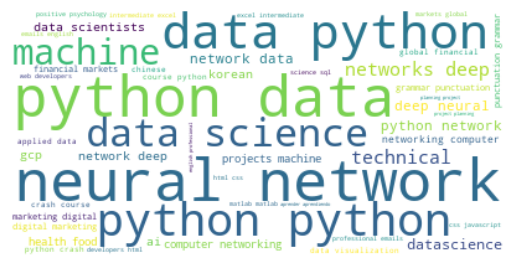

In [8]:
# Se gera Wordcloud para course-Id
course_id = " ".join(course_id for course_id in df_cour_rev.course_id)
print ("There are {} words in the combination of all review.".format(len(course_id)))
stopwords = set(STOPWORDS)
stopwords.update(["basic", "learn", "fundamental", "international", "wharton",
                "fundamentals","introduction","intro","uva darden","uva","darden",
                "principles","foundation","foundations","learning","big","everyday","tools",
                "support","well","essentials","everyone","analysis"])
#buscar las filas que tengan wharton
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_font_size=80, max_words=50,background_color="white").generate(course_id)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("./img_coursera.png")

7. Limpieza de datos columna Rating

<AxesSubplot:xlabel='rating', ylabel='Count'>

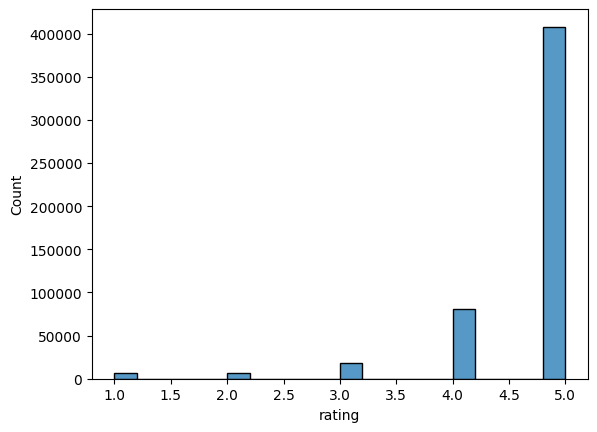

In [9]:
# se genera gráfica para evaluar la generación de categorias 
sns.histplot(df_cour_rev["rating"])

In [10]:
#Sepuede dividir en tres categorias alto[4-5] medio[3-4] bajo [0-3]
print(df_cour_rev["rating"].value_counts())
review_dict={1:"low",
             2:"low",
             3:"low",
             4:"medium",
             5:"high"}
#df2=df.replace({"Courses": dict})

df_cour_rev.replace({"rating":review_dict},inplace=True)
print(df_cour_rev["rating"].value_counts())

5    408085
4     81386
3     17728
1      6623
2      6069
Name: rating, dtype: int64
high      408085
medium     81386
low        30420
Name: rating, dtype: int64


8. Generación de wordcloud para reviews de baja valoración, identificando de ese modo posibles mejoras competitivass

There are 6943021 words in the combination of all review.


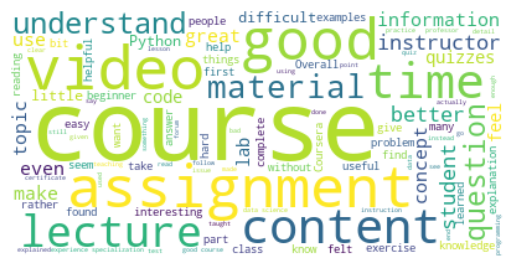

In [11]:
#Filtrar rating low
mask = df_cour_rev["rating"] == "low"
df_low_review = df_cour_rev["reviews"][mask]

low_review_text = " ".join(low_review_text for low_review_text in df_low_review)
print ("There are {} words in the combination of all review.".format(len(low_review_text)))

stopwords = set(STOPWORDS)
stopwords.update(["basic", "learn", "fundamental", "international", "wharton",
                "fundamentals","introduction","intro","uva darden","uva","darden",
                "principles","foundation","foundations","learning","big","everyday","tools",
                "support","well","essentials","everyone","analysis","one","lot","week",
                "need","way","will","think","much","example","work","thing","really"])
#buscar las filas que tengan wharton
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_font_size=80, max_words=100,background_color="white").generate(low_review_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("./img_coursera_low.jpg")

9. Finalmente se eliminan las columnas redundantes producto de la limpeza de datos y que no serán de utilidad para posteriores análisis o  

In [12]:
df_cour_rev.drop(columns=["reviews","reviewers"],axis=1,inplace=True)
df_cour_rev.rename(columns={"reviews_clean":"reviews","reviewers_clean":"reviewers"},inplace=True)

10. El último paso es la generación de un archivo csv que posteriormente sera usado para generar un Dashboard en power bi

In [13]:
df_cour_rev.to_csv("coursera_reviews.csv")